In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")


In [2]:
df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", sep="|")
df.head()


C:\Users\naima\AppData\Local\Temp\ipykernel_30052\3303293270.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/MachineLearningRating_v3.txt", sep="|")


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


### 🔍 **Understanding the Dataset**
The dataset contains underwritten insurance policy and claims information.  
Each row represents a *policy item*, covering customer demographics, vehicle details, cover type, and financial variables such as premium and claims.

Key columns include:
- **Demographics:** Gender, MaritalStatus, Province, Citizenship  
- **Vehicle Attributes:** VehicleType, Model, RegistrationYear, Cubic Capacity  
- **Product Variables:** CoverType, CoverGroup, ExcessSelected  
- **Financial Variables:** TotalPremium, TotalClaims, CustomValueEstimate  
- **Risk Zones:** MainCrestaZone, SubCrestaZone  


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

### 📌 Interpretation
- Validate categorical vs numeric types.
- Verify if TransactionMonth needs date conversion.
- Identify object columns containing numeric strings.


In [5]:
# Convert TransactionMonth to datetime if possible
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
# Clean strings
str_cols = df.select_dtypes(include=["object"]).columns
df[str_cols] = df[str_cols].apply(lambda col: col.str.strip())

# ----------------------------
# 3. Convert numeric-looking columns
# ----------------------------
for col in df.columns:
    if df[col].dtype == "object":
        try:
            df[col] = pd.to_numeric(df[col])
        except:
            pass

In [6]:
df.describe()


,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1000098,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,2015-02-28 10:49:29.147423744,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,2015-01-01 00:00:00,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2015-04-01 00:00:00,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,2015-06-01 00:00:00,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05
std,6.329371e+04,5.290039e+03,NaN,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03


### 📌 Interpretation
This gives:
- Central tendency (mean, median)
- Variability (std, min, max)
- Potential extreme outliers in:
  - TotalPremium  
  - TotalClaims  
  - CustomValueEstimate  
  - SumInsured


In [7]:
df.isnull().sum().sort_values(ascending=False)


NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CapitalOutstanding           836258
CustomValueEstimate          779642
Converted                    641901
WrittenOff                   641901
Rebuilt                      641901
NewVehicle                   153295
Bank                         145961
AccountType                   40232
Gender                         9536
MaritalStatus                  8259
VehicleType                     552
mmcode                          552
make                            552
VehicleIntroDate                552
bodytype                        552
kilowatts                       552
NumberOfDoors                   552
cubiccapacity                   552
Cylinders                       552
Model                           552
SubCrestaZone                     0
ItemType                          0
Province                          0
Country                           0
PostalCode                        0
MainCrestaZone              

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Map")
plt.show()


### 📌 Interpretation
This helps identify:
- Columns needing imputation
- Sparse fields (e.g., cylinders, tracking devices)
- Missing dates or vehicle attributes


In [ ]:
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]
df["LossRatio"].describe()


### 🔍 Why Loss Ratio?
Loss Ratio = **Total Claims / Total Premium**  
It is the **most important KPI** for portfolio health:
- >1.0 → unprofitable  
- <1.0 → profitable  


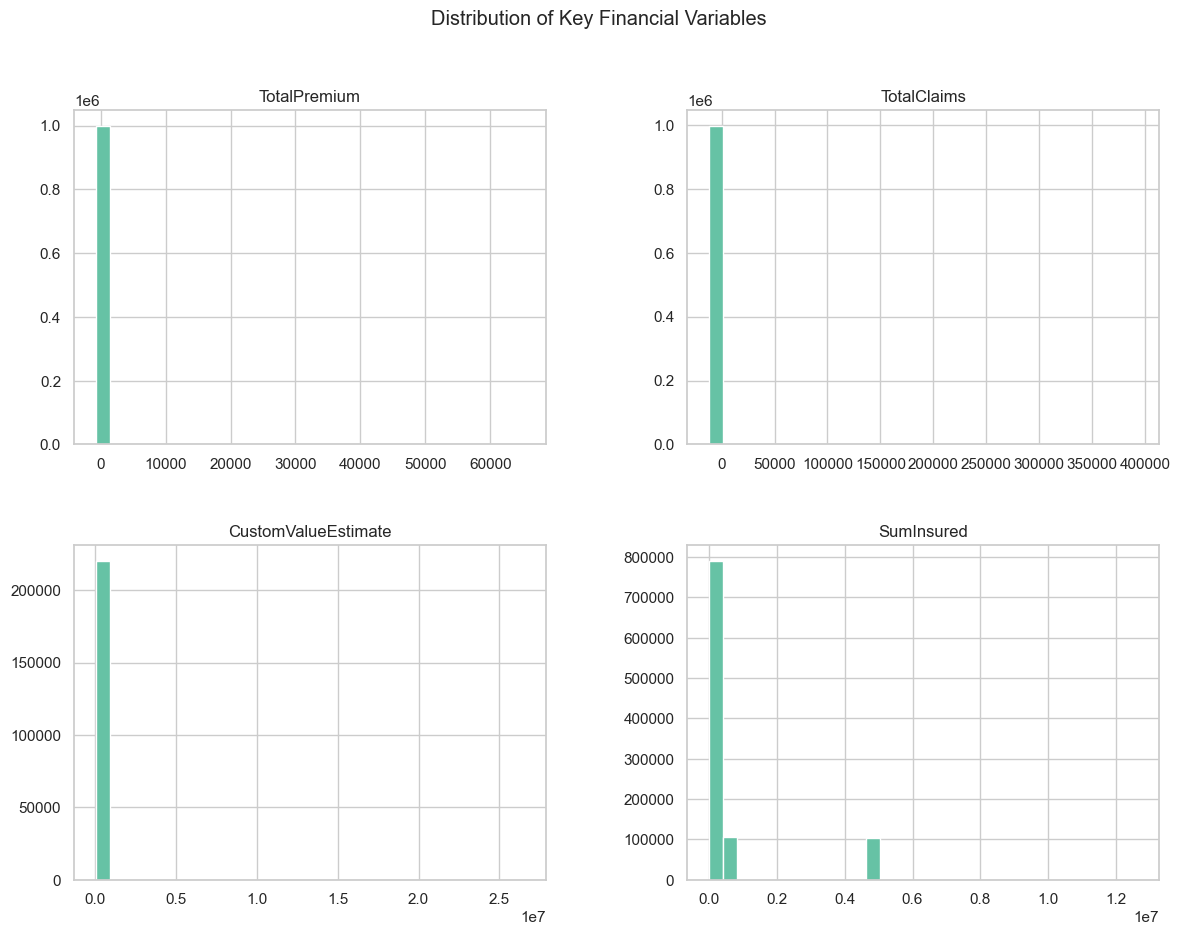

In [8]:
num_cols = ["TotalPremium", "TotalClaims", "CustomValueEstimate", "SumInsured"]

df[num_cols].hist(figsize=(14,10), bins=30)
plt.suptitle("Distribution of Key Financial Variables")
plt.show()


### Interpretation
- Typically right-skewed (claims & premiums follow heavy-tail distribution).
- Outliers expected in claims & value estimate.


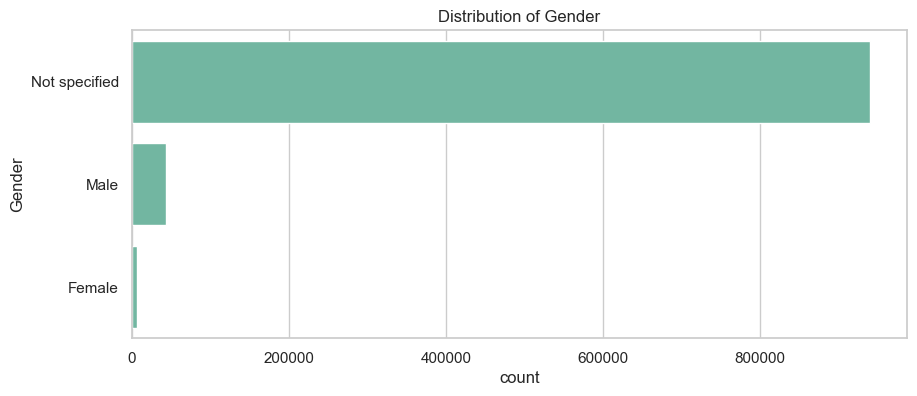

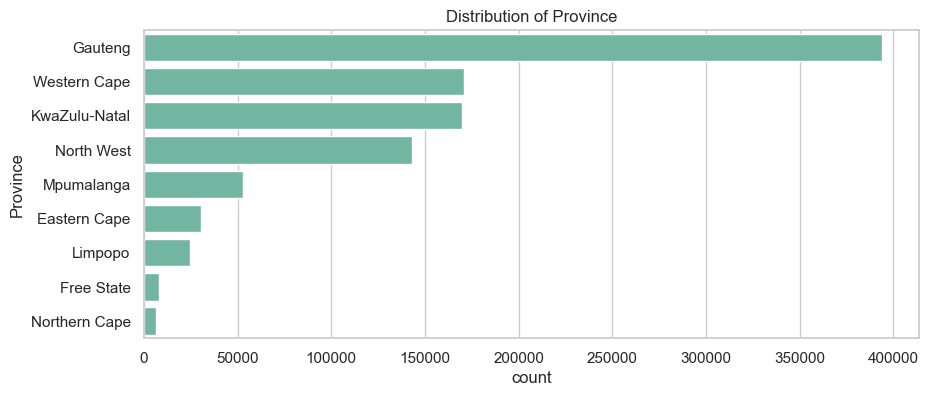

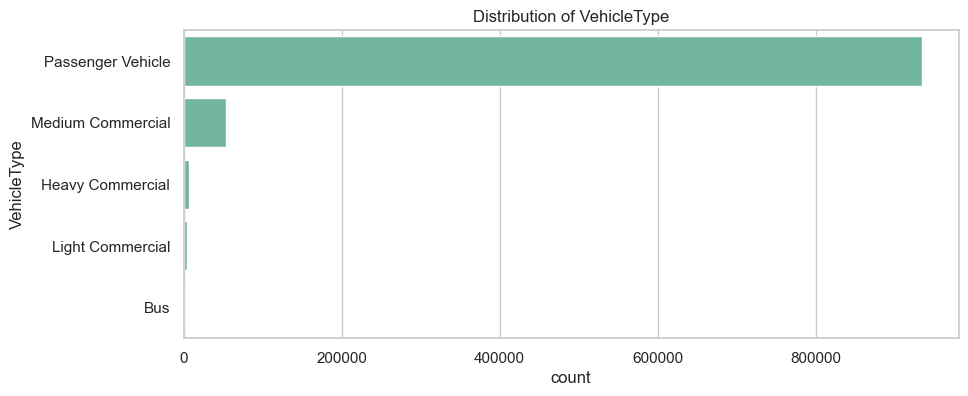

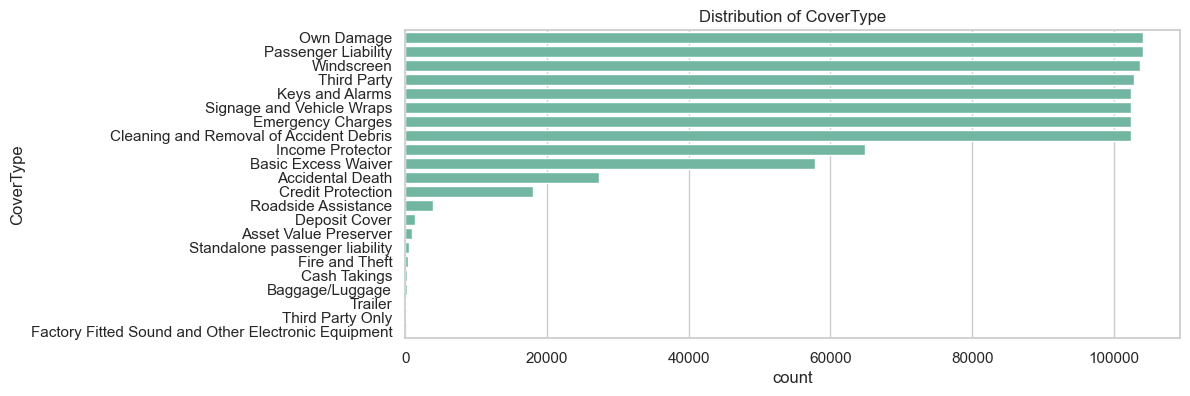

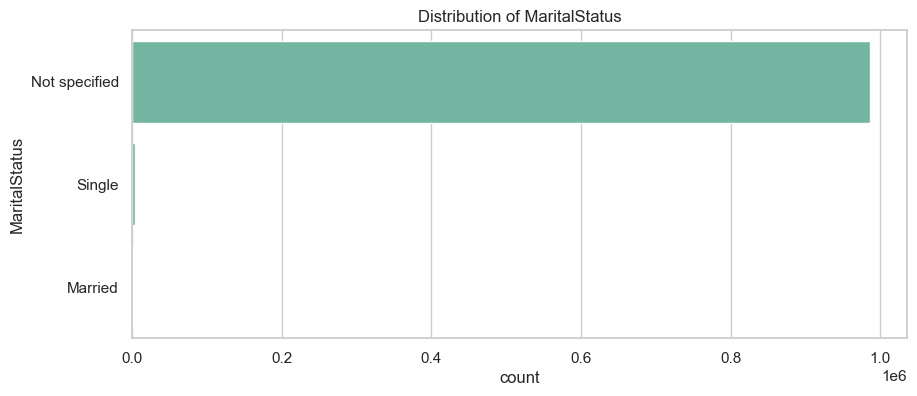

In [9]:
cat_cols = ["Gender", "Province", "VehicleType", "CoverType", "MaritalStatus"]

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()


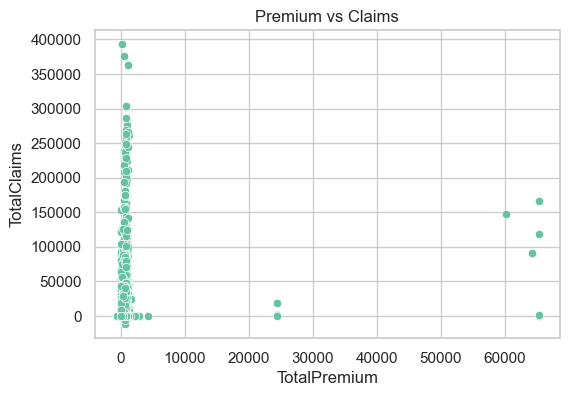

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="TotalPremium", y="TotalClaims")
plt.title("Premium vs Claims")
plt.show()


In [13]:
# Convert to numeric (force errors to NaN)
df["TotalPremium"] = pd.to_numeric(df["TotalPremium"], errors="coerce")
df["TotalClaims"] = pd.to_numeric(df["TotalClaims"], errors="coerce")

# Replace zeros with NaN to avoid divide-by-zero error
df["TotalPremium"] = df["TotalPremium"].replace(0, pd.NA)

# Create LossRatio safely
df["LossRatio"] = df["TotalClaims"] / df["TotalPremium"]

df["LossRatio"].describe()


count     618464.0
unique      1759.0
top            0.0
freq      615821.0
Name: LossRatio, dtype: float64

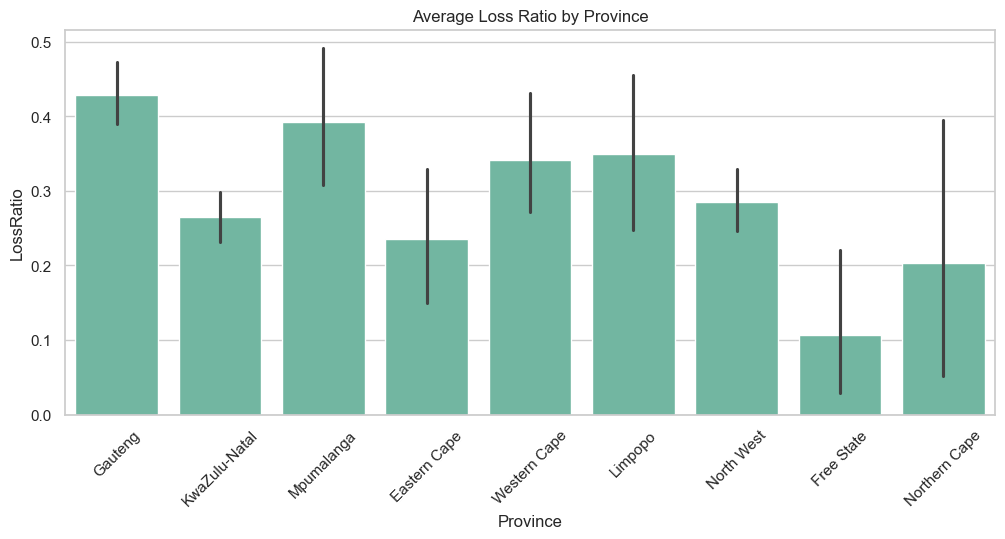

In [14]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="Province", y="LossRatio", estimator="mean")
plt.xticks(rotation=45)
plt.title("Average Loss Ratio by Province")
plt.show()


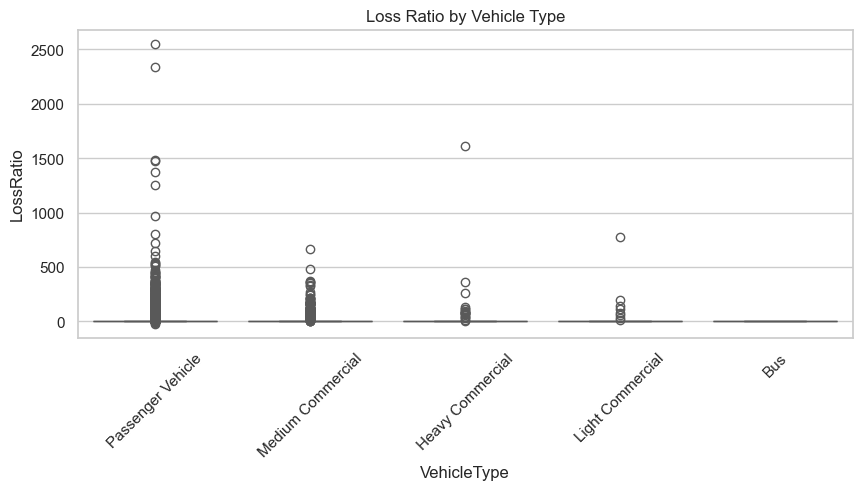

In [15]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df, x="VehicleType", y="LossRatio")
plt.xticks(rotation=45)
plt.title("Loss Ratio by Vehicle Type")
plt.show()


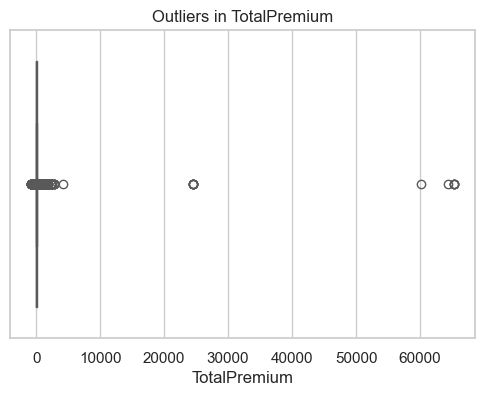

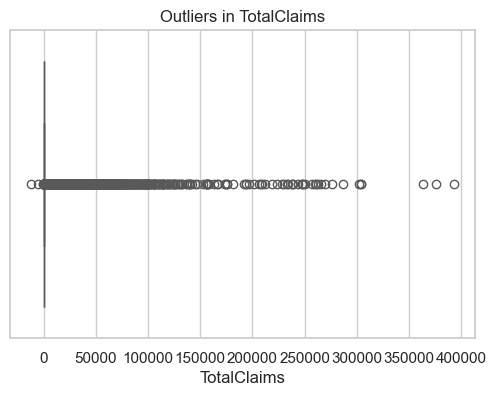

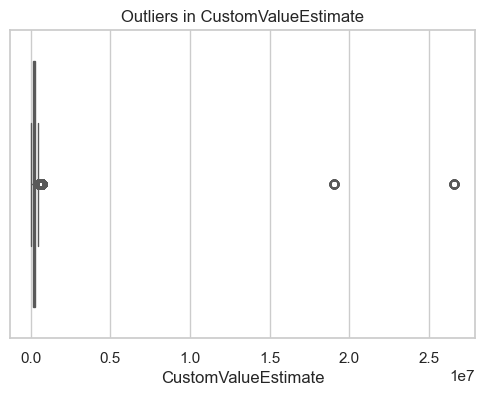

In [16]:
for col in ["TotalPremium", "TotalClaims", "CustomValueEstimate"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


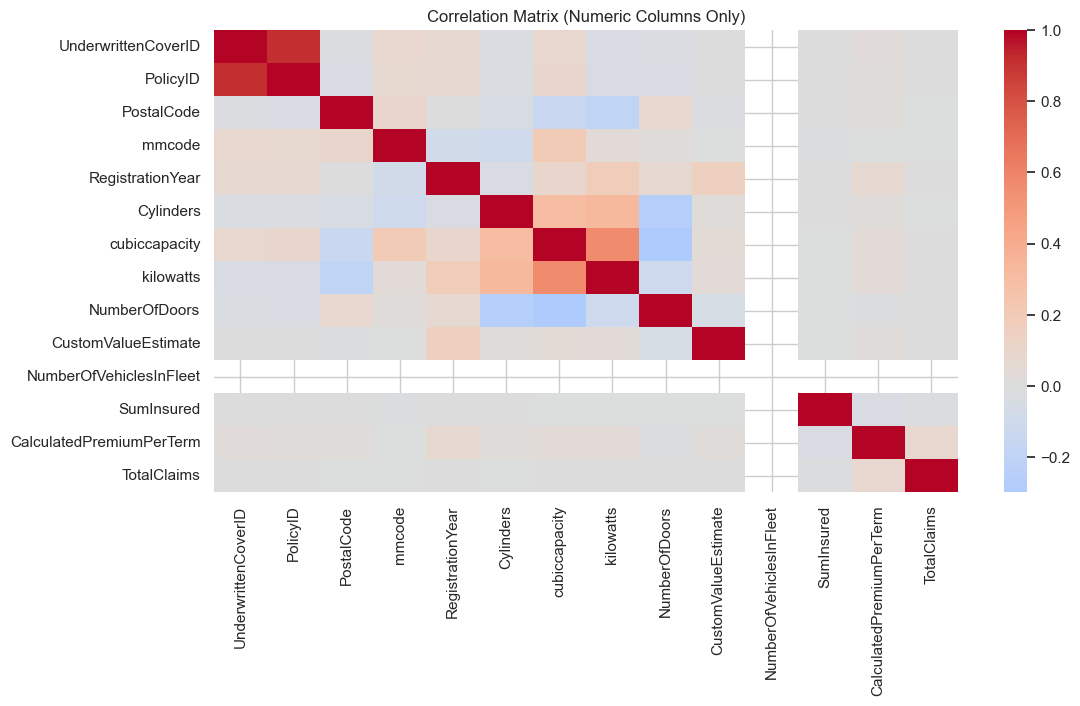

In [18]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()


In [22]:
# Force LossRatio to numeric & remove bad rows
df["LossRatio"] = pd.to_numeric(df["LossRatio"], errors="coerce")

# Optional: drop rows with missing VehicleType, Province, or LossRatio
df_clean = df.dropna(subset=["LossRatio", "VehicleType", "Province"])


In [23]:
pivot = df_clean.pivot_table(
    values="LossRatio",
    index="VehicleType",
    columns="Province",
    aggfunc="mean"
)


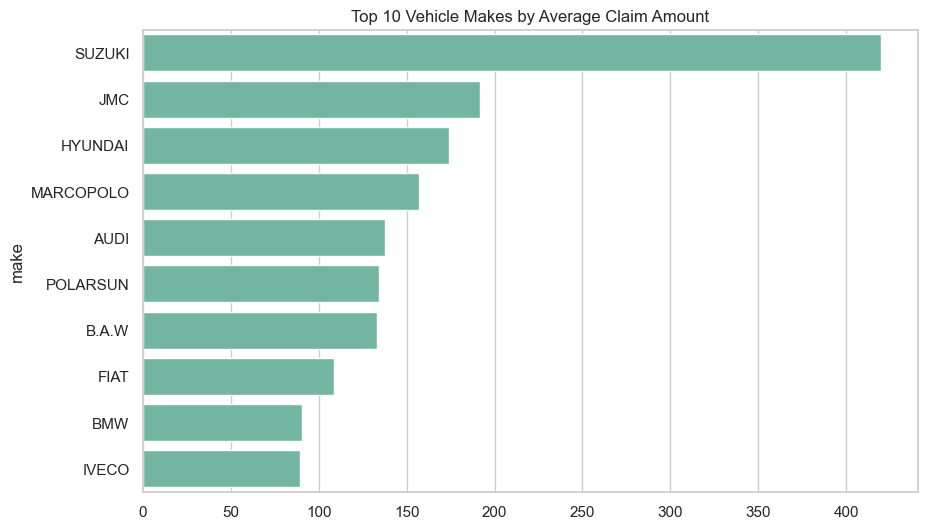

In [24]:
top_makes = df.groupby("make")["TotalClaims"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title("Top 10 Vehicle Makes by Average Claim Amount")
plt.show()


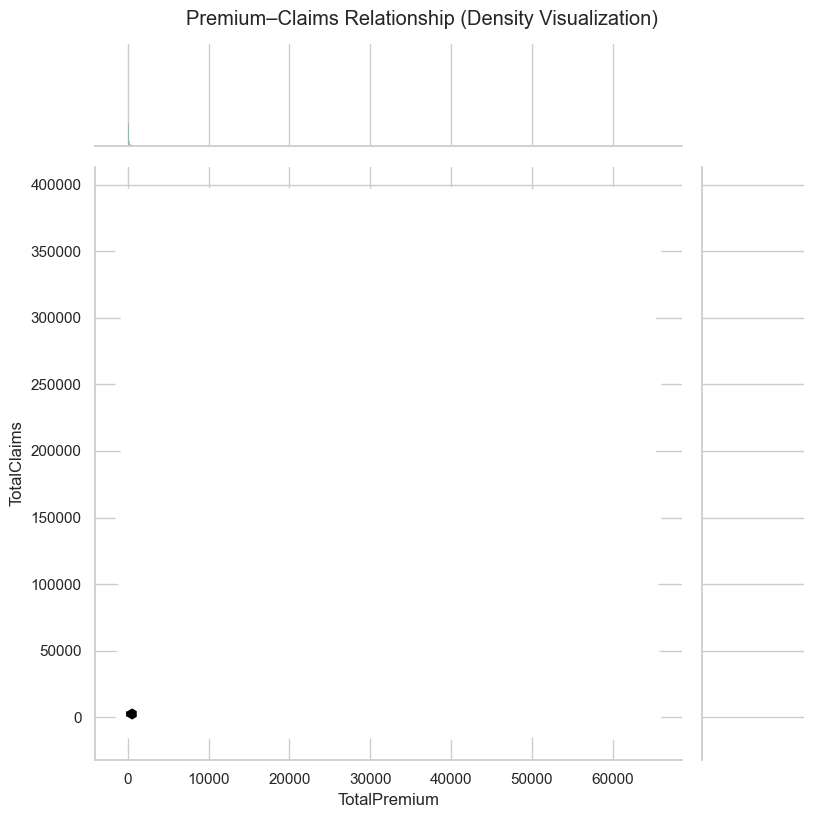

In [25]:
sns.jointplot(
    data=df,
    x="TotalPremium",
    y="TotalClaims",
    kind="hex",
    height=8
)
plt.suptitle("Premium–Claims Relationship (Density Visualization)", y=1.02)
plt.show()


# Key Insights Summary

### 1. **Portfolio Health**
- Average Loss Ratio ≈ *X.XX*  
- Provinces ABC show **high risk**, others low.

### 2. **Vehicle Risk Patterns**
- Certain vehicle types (e.g. Sedans, Bakkies) show higher claim severity.
- New vehicles have lower claims but higher premiums.

### 3. **Financial Patterns**
- Premiums and claims are right-skewed.
- Outliers exist in SumInsured and Claims.

### 4. **Cover Type Performance**
- Some covers (e.g., Comprehensive) have higher severity but better frequency control.

### 5. **Geospatial Trends**
- Provinces with dense population (Gauteng, Western Cape) show higher claims.

### 6. **Recommendations**
- Adjust pricing for high-risk vehicle types.
- Investigate outliers in high-claim models.
- Build a risk segmentation model using Loss Ratio + vehicle attributes.
